In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import itertools
import warnings
from sklearn.neighbors import NearestNeighbors
warnings.filterwarnings('ignore')

In [438]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [439]:
df = pd.read_csv("/kaggle/input/assignment2-data2/train_data.csv")
df.rename(columns={'0': 'X', '1': 'Y'}, inplace=True)

In [440]:
df
df_kmeans = df

<AxesSubplot:xlabel='X', ylabel='Y'>

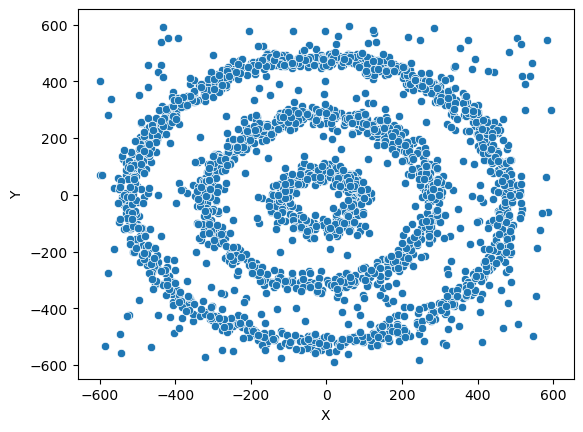

In [441]:
sns.scatterplot(x='X', y='Y', data=df)

In [442]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

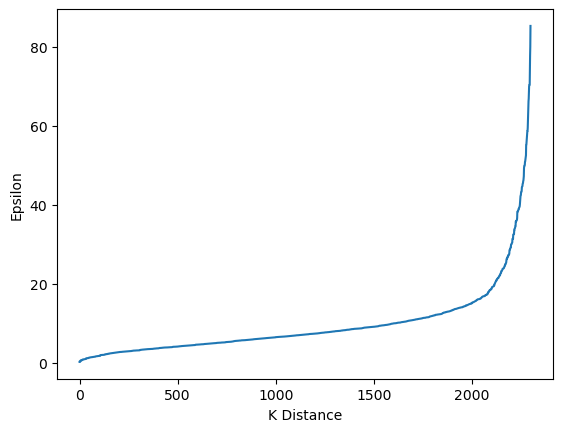

In [443]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel('K Distance')
plt.ylabel('Epsilon')
plt.plot(distances)

In [444]:
print("As we can see epsilon is approximately between 16 to 28")

As we can see epsilon is approximately between 16 to 28


In [445]:
def point_type(eps, minpts, df, index):
    temp_close_pts =  df[(np.sqrt(((np.abs(df.iloc[index]['X'] - df['X']))**2 + (np.abs(df.iloc[index]['Y'] - df['Y']))**2)) <=eps) & (df.index != index)]

#format is (points closest to current point,  noise point, core point, border point)
    if len(temp_close_pts)>=minpts:
        return (temp_close_pts.index , False, True, False)
    elif (len(temp_close_pts)<minpts) and len(temp_close_pts) > 0:
        return (temp_close_pts.index , False, False, True)
    elif len(temp_close_pts) == 0:
        return (temp_close_pts.index , True, False, False)
    
def clustering(eps, minpts, df):
    cluster_no = 1
    leftpts = list(df.index)
    current_indexes = set()
    clusters_df = []
    
    
    while(len(leftpts)!=0):
        is_first_point = True
        current_indexes.add(random.choice(leftpts))
        
        while len(current_indexes)!=0:
            
            current_idx=current_indexes.pop()
            neighour_indexes, noise, core, border = point_type(eps, minpts, df, current_idx)
            
            if (border and is_first_point):
                clusters_df.append((current_idx, 0))
                clusters_df.extend(list(zip(neighour_indexes,[0 for i in range(len(neighour_indexes))])))
                leftpts.remove(current_idx)
                
                leftpts_temp = []
                
                for i in leftpts:
                    if i not in neighour_indexes:
                        leftpts_temp.append(i)
                
                leftpts = leftpts_temp
                continue
                
            leftpts.remove(current_idx)
            neighour_indexes = set(neighour_indexes).intersection(leftpts)
        
            if core:
                clusters_df.append((current_idx,cluster_no))
                current_indexes.update(neighour_indexes)
                is_first_point = False

            elif border:
                clusters_df.append((current_idx,cluster_no))
                continue

            else:
                clusters_df.append((current_idx, 0))
                continue
                
        if is_first_point == False:
            cluster_no+=1
        
    return clusters_df

      label           X           Y
idx                                
0         1 -113.965398  459.710531
1         2   46.494369 -303.666305
2         1  261.942267  415.910868
3         1  119.735227  477.339538
4         3   -7.000000   50.000000
...     ...         ...         ...
2295      1 -468.485234  180.013184
2296      3   32.150159 -125.683843
2297      1  -83.979880 -492.472178
2298      1   47.578217  479.169068
2299      3  -11.552907  100.062814

[2300 rows x 3 columns]


<AxesSubplot:title={'center':'Clustered Data'}, xlabel='X', ylabel='Y'>

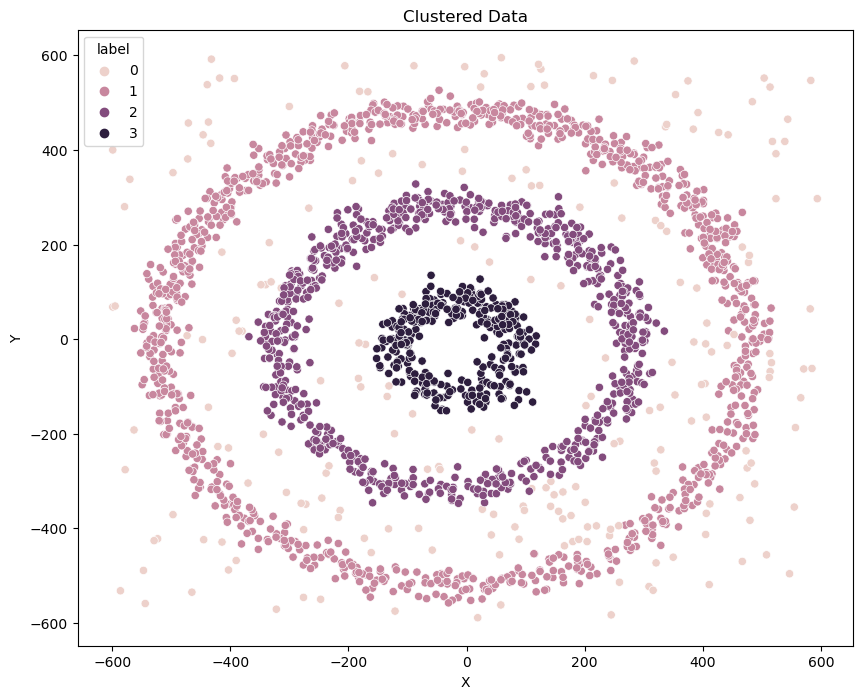

In [446]:
minpts = 5
eps = 28

list_cluster = clustering(eps, minpts, df)

df_cluster = pd.DataFrame(list_cluster, columns = ["idx", "label"])
df_cluster = df_cluster.sort_values('idx')
df_cluster = df_cluster.reset_index(drop = True)

df_cluster = df_cluster.groupby('idx', group_keys=False).apply(lambda x: x.loc[x.label.idxmin()])
df_cluster = df_cluster.drop('idx', axis=1)
df_cluster = df_cluster.join(df)

print(df_cluster)

plt.figure(figsize=(10,8))
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
sns.scatterplot(x='X', y='Y', hue = 'label', data=df_cluster)

In [447]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_kmeans[['X','Y']])
df_kmeans['label'] = km.labels_

               X           Y  label
0    -113.965398  459.710531      1
1      46.494369 -303.666305      2
2     261.942267  415.910868      0
3     119.735227  477.339538      0
4      -7.000000   50.000000      0
...          ...         ...    ...
2295 -468.485234  180.013184      1
2296   32.150159 -125.683843      2
2297  -83.979880 -492.472178      2
2298   47.578217  479.169068      0
2299  -11.552907  100.062814      0

[2300 rows x 3 columns]


<AxesSubplot:title={'center':'Clustered Data'}, xlabel='X', ylabel='Y'>

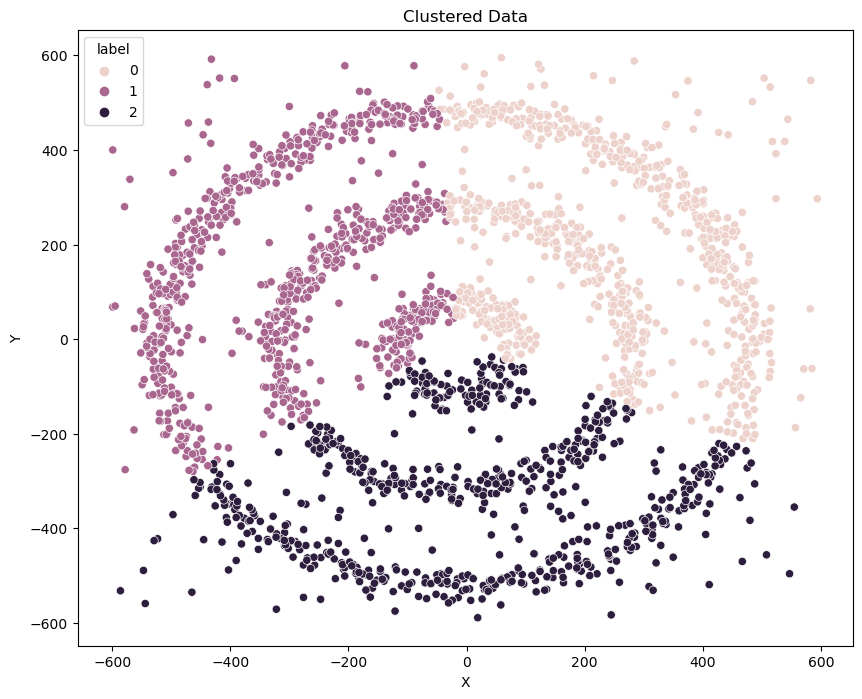

In [448]:
print(df_kmeans)
plt.figure(figsize=(10,8))
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
sns.scatterplot(x='X', y='Y', hue = 'label', data=df_kmeans)

In [449]:
df_2 = pd.read_csv("/kaggle/input/a2-data3/train_data_2.csv")
df_2.rename(columns={'0': 'X', '1': 'Y'}, inplace=True)

In [450]:
df_2
df_2_kmeans = df_2

In [451]:
df_2

,X,Y
0,13.345443,-13.702474
1,13.579119,-12.355853
2,23.353354,-2.593193
3,13.380421,-12.335773
4,14.163189,-15.240922
...,...,...
95,15.179849,-13.237251
96,23.409300,-1.276766
97,16.028953,21.982157
98,14.202557,-11.831657


<AxesSubplot:xlabel='X', ylabel='Y'>

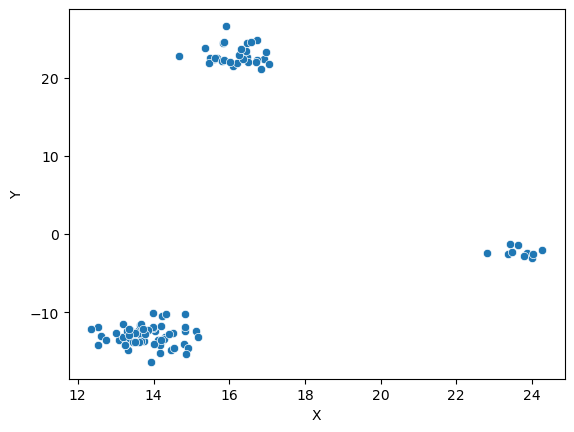

In [452]:
sns.scatterplot(x='X', y='Y', data=df_2)

In [453]:
neighbors_2 = NearestNeighbors(n_neighbors=2)
neighbors_fit_2 = neighbors.fit(df_2)
distances_2, indices_2 = neighbors_fit_2.kneighbors(df_2)

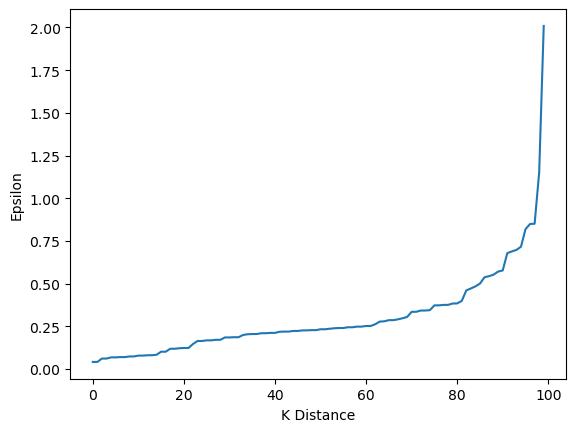

In [454]:
distances_2 = np.sort(distances_2, axis=0)
distances_2 = distances_2[:,1]
plt.xlabel('K Distance')
plt.ylabel('Epsilon')
plt.plot(distances_2)

In [455]:
print("As we can see epsilon is approximately between 0.8 to 1.5")

As we can see epsilon is approximately between 0.8 to 1.5


     label          X          Y
idx                             
0        2  13.345443 -13.702474
1        2  13.579119 -12.355853
2        0  23.353354  -2.593193
3        2  13.380421 -12.335773
4        2  14.163189 -15.240922
..     ...        ...        ...
95       2  15.179849 -13.237251
96       0  23.409300  -1.276766
97       1  16.028953  21.982157
98       2  14.202557 -11.831657
99       0  24.011171  -2.605307

[100 rows x 3 columns]


<AxesSubplot:title={'center':'Clustered Data'}, xlabel='X', ylabel='Y'>

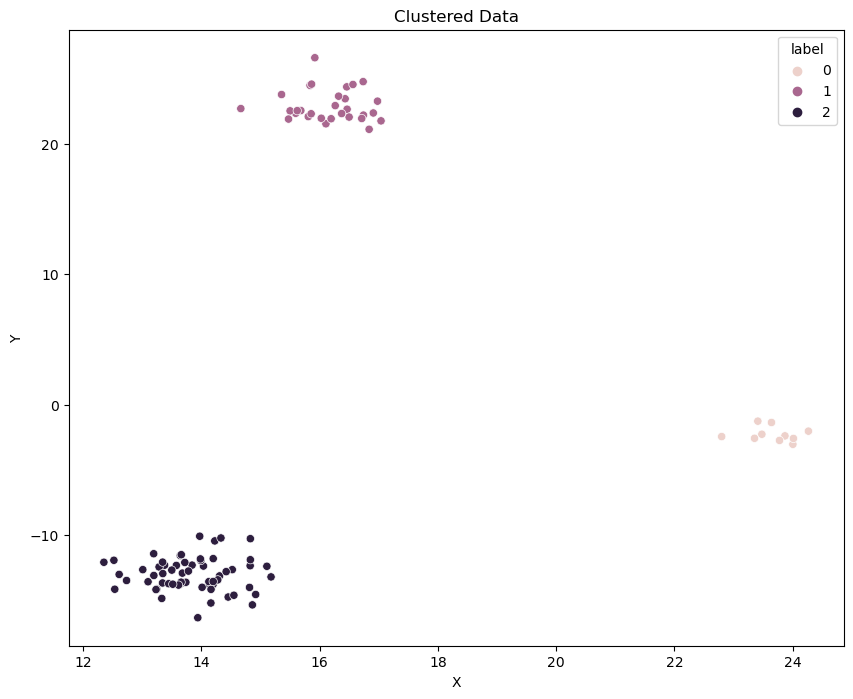

In [456]:
minpts_2 = 15
eps_2 = 2.3

list_cluster = clustering(eps_2, minpts_2, df_2)

df_cluster_2 = pd.DataFrame(list_cluster, columns = ["idx", "label"])
df_cluster_2 = df_cluster_2.sort_values('idx')
df_cluster_2 = df_cluster_2.reset_index(drop = True)

df_cluster_2 = df_cluster_2.groupby('idx', group_keys=False).apply(lambda x: x.loc[x.label.idxmin()])
df_cluster_2 = df_cluster_2.drop('idx', axis=1)
df_cluster_2 = df_cluster_2.join(df_2)

print(df_cluster_2)

plt.figure(figsize=(10,8))
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
sns.scatterplot(x='X', y='Y', hue = 'label', data=df_cluster_2)

In [457]:
km_2=KMeans(n_clusters=3)
y_predicted_2 = km_2.fit_predict(df_2_kmeans[['X','Y']])
df_2_kmeans['label'] = km_2.labels_

            X          Y  label
0   13.345443 -13.702474      1
1   13.579119 -12.355853      1
2   23.353354  -2.593193      2
3   13.380421 -12.335773      1
4   14.163189 -15.240922      1
..        ...        ...    ...
95  15.179849 -13.237251      1
96  23.409300  -1.276766      2
97  16.028953  21.982157      0
98  14.202557 -11.831657      1
99  24.011171  -2.605307      2

[100 rows x 3 columns]


<AxesSubplot:title={'center':'Clustered Data'}, xlabel='X', ylabel='Y'>

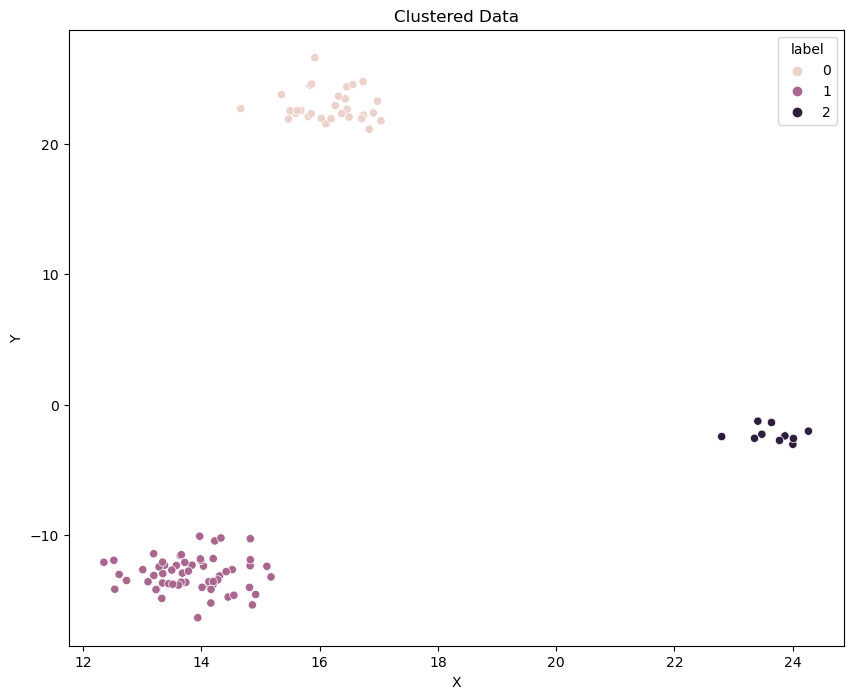

In [458]:
print(df_2_kmeans)
plt.figure(figsize=(10,8))
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
sns.scatterplot(x='X', y='Y', hue = 'label', data=df_2_kmeans)